In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries and load dataset**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the SUNSPOT dataset
file_path = '/content/drive/MyDrive/SUNSPOT dataset.csv'
sunspot_data = pd.read_csv(file_path)
sunspot_data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [ ]:
# Extract the column as the target variable
sunspots = sunspot_data['Monthly Mean Total Sunspot Number'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
sunspots_normalized = scaler.fit_transform(sunspots.reshape(-1, 1))

**RNN model**

In [ ]:
# Create sequences for the RNN model
sequence_length = 10
sequences = []
targets = []

for i in range(len(sunspots_normalized) - sequence_length):
    sequences.append(sunspots_normalized[i:i+sequence_length])
    targets.append(sunspots_normalized[i+sequence_length])

X = np.array(sequences)
y = np.array(targets)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

**Compile the model**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train the model**

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
82/82 - 2s - loss: 0.0134 - val_loss: 0.0051 - 2s/epoch - 23ms/step
Epoch 2/50
82/82 - 0s - loss: 0.0047 - val_loss: 0.0043 - 354ms/epoch - 4ms/step
Epoch 3/50
82/82 - 0s - loss: 0.0043 - val_loss: 0.0041 - 366ms/epoch - 4ms/step
Epoch 4/50
82/82 - 1s - loss: 0.0042 - val_loss: 0.0040 - 671ms/epoch - 8ms/step
Epoch 5/50
82/82 - 1s - loss: 0.0041 - val_loss: 0.0039 - 584ms/epoch - 7ms/step
Epoch 6/50
82/82 - 1s - loss: 0.0040 - val_loss: 0.0042 - 663ms/epoch - 8ms/step
Epoch 7/50
82/82 - 1s - loss: 0.0040 - val_loss: 0.0042 - 517ms/epoch - 6ms/step
Epoch 8/50
82/82 - 1s - loss: 0.0041 - val_loss: 0.0039 - 601ms/epoch - 7ms/step
Epoch 9/50
82/82 - 1s - loss: 0.0040 - val_loss: 0.0042 - 581ms/epoch - 7ms/step
Epoch 10/50
82/82 - 0s - loss: 0.0040 - val_loss: 0.0040 - 440ms/epoch - 5ms/step
Epoch 11/50
82/82 - 0s - loss: 0.0040 - val_loss: 0.0042 - 351ms/epoch - 4ms/step
Epoch 12/50
82/82 - 0s - loss: 0.0040 - val_loss: 0.0042 - 349ms/epoch - 4ms/step
Epoch 13/50
82/82 - 0s - lo

**Evaluate and predict**

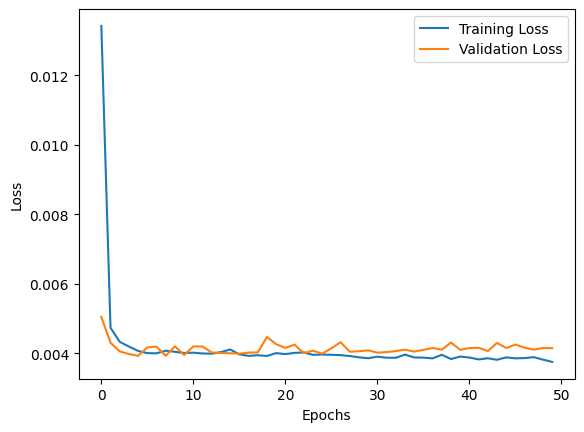

In [ ]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

Test Loss: 0.004148485139012337


In [ ]:
# Make predictions
predictions = model.predict(X_test)

21/21 [==============================] - 0s 2ms/step


In [ ]:
# Inverse transform the predictions and actual values to the original scale
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

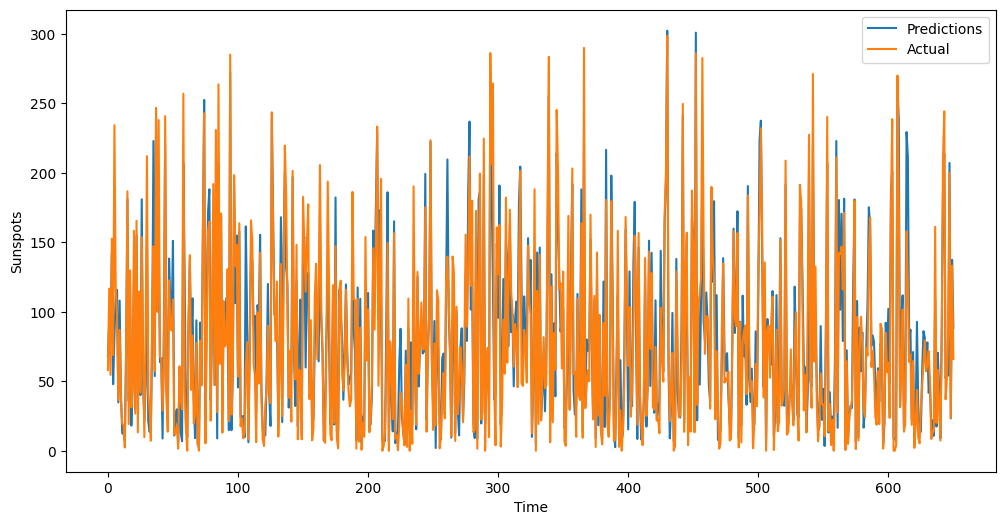

In [ ]:
# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(predictions_original, label='Predictions')
plt.plot(y_test_original, label='Actual')
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.legend()
plt.show()